# Построение движка игры на pygame

## 1. Общий план

Мы разобъем наш движок на несколько файлов примерно со следующими названиями: 
- characters.py
- weapon.py
- objects.py
- interface.py

В них мы будем проектировать различные игровые объекты, расширять их и добавлять новые.<br>
Но для создания собственной игры мы создадим отдельный файл __game.py__

## 2. Подготовка к работе

Установим библиотеку для написание 2D игр - __pygame__<br>
Для этогов в __консоли__ pycharm пропишем:

In [1]:
# !pip install pygame

  Using cached https://files.pythonhosted.org/packages/9a/99/74ff08a397530af1e48640a5394af2e3df4fd4f720e221a3e45637485337/pygame-2.0.1-cp37-cp37m-win_amd64.whl


__pygame__ - библиотека для написания 2D игр, она достаточно низкоуровневая для того, что бы на ее примере мы потренировались писать движок, для создания различных 2D игр.<br>
Больше информации по __pygame__ можно просмотреть по ссылке: https://www.pygame.org/news

Далее, создадим сразу наш: 
- __game.py__ - здась мы будем выкладывать рабочую версию игры 
- и __test.py__ - он нам нужен для тестирования механики работы игры

## 3. Основная структура игры

Зайдем в наш __test.py__<br>
Импортируем сюда библиотеку __pygame__

In [1]:
import pygame

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


Вся игра проецируется внутри родительского окна

In [2]:
parentSurface = pygame.display.set_mode(
    size=(400, 200) # size - размер, где первое число - ширина, второе высота окна
) # метод для создания родительского окна

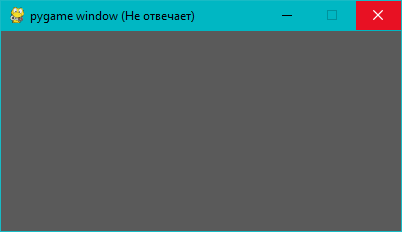

При первом запуске родительского окна оно зависает, а у нас вылетает ошибка в консоли<br>
Это происходит потому что родительское окно производит какие то события и поэтому должно обновляться для нормального функционирования<br>
Для этого нам нужно создать бесконечный цикл в котором будем отслеживать эти события

In [1]:
import pygame

parentSurface = pygame.display.set_mode(
    size=(400, 200) # size - размер, где первое число - ширина, второе высота окна
) # метод для создания родительского окна

while True: # игровой цикл
    for event in pygame.event.get(): # отслеживание событий
        pass # заглушка

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

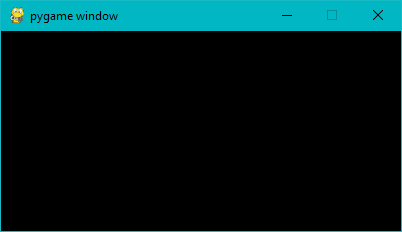

Теперь наше окно не зависает однако мы не можем его нормально выключить - приходится отключать __интерпритатор__ вручную - исправим это<br>
Для этого мы проделаем следующие операции:
- деинициализируем pygame
- остановим главный цикл

Для начало посмотрим, какие вообще __собирия__ происходят внутри родительского окна - добавим __print__

In [1]:
import pygame

parentSurface = pygame.display.set_mode(
    size=(400, 200) # size - размер, где первое число - ширина, второе высота окна
) # метод для создания родительского окна

while True: # игровой цикл
    for event in pygame.event.get(): # отслеживание событий
        print(event)

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
<Event(32774-WindowShown {'window': None})>
<Event(32768-ActiveEvent {'gain': 1, 'state': 1})>
<Event(32785-WindowFocusGained {'window': None})>
<Event(770-TextEditing {'text': '', 'start': 0, 'length': 0, 'window': None})>
<Event(32770-VideoExpose {})>
<Event(32776-WindowExposed {'window': None})>
<Event(770-TextEditing {'text': '', 'start': 0, 'length': 0, 'window': None})>
<Event(770-TextEditing {'text': '', 'start': 0, 'length': 0, 'window': None})>
<Event(770-TextEditing {'text': '', 'start': 0, 'length': 0, 'window': None})>
<Event(772-Unknown {})>
<Event(32770-VideoExpose {})>
<Event(32776-WindowExposed {'window': None})>
<Event(768-KeyDown {'unicode': '\x1b', 'key': 27, 'mod': 4096, 'scancode': 41, 'window': None})>
<Event(769-KeyUp {'unicode': '\x1b', 'key': 27, 'mod': 4096, 'scancode': 41, 'window': None})>
<Event(32787-WindowClose {'window': None})>
<Event(256-Quit

KeyboardInterrupt: 

Здесь мы увидели множество собитий лишь пока запускати и пытились выключить окно - нажимая при этом на клавишу __ESC__ и на __крестик__ - они так же отслеживались к вонсоли, найдем эти события <br>

Первыым было нажатие на __ESC__: <br>
<Event(768-KeyDown {'unicode': '\x1b', 'key': 27, 'mod': 4096, 'scancode': 41, 'window': None})>

Вторым на __крестик__: <br>
<Event(256-Quit {})> <br>

Давайте обработаем эти события так, что бы они помогали нам закрывать окно

In [3]:
import pygame

parentSurface = pygame.display.set_mode(
    size=(400, 200)
)

run = True # добавим переменную для управлением цикла внутри него
while run: # вставим переменную в цикл
    
    for event in pygame.event.get():
        
        if event.type == 256 or (event.type == 768 and event.key == 27): # если нажал крестик или ESC
            
            pygame.quit() # деинициализируем pygame
            run = False   # отключаем цикл

Ну вот и все - основа у нас есть<br>
Отправим ее в __game.py__ и займемся наполнением

##  4. Создание объектов

Первый объект это собственно сама игра <br>
Наш код будет разрастаться, будут добавляться дополнительные методы, поэтому сразу перенесем его на рельсы ООП и будем описывать документацию - в будущем нам это ооочень поможет)

In [1]:
"""
Модуль самой игры.
Он содержит в себе класс Game - в котором проектируется сама игра
"""

import pygame


class Game:
    """
    Класс игры, здесь праектируется пример игры
    """

    def __init__(self, width=400, height=300):
        """
        :parameter width: высота окна
        :parameter height: ширина окна
        """
        parentSurface = pygame.display.set_mode(
            size=(width, height)
        )  # родительское окно

    @staticmethod
    def run() -> None:
        """
        Статический метод для управления родительским окном
        :return:
        """

        running = True
        while running:
            for event in pygame.event.get():
                if event.type == 256 or (event.type == 768 and event.key == 27):  # если нажал крестик или ESC
                    pygame.quit()  # деинициализируем pygame
                    running = False  # отключаем цикл


Game().run()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
